In [101]:
import altair as alt
import numpy as np
import pandas as pd

In [102]:
import matplotlib.pyplot as plt

In [187]:
ndvi_ppt_tempt_pasture_pasture2 = pd.read_csv('./pasture2.csv')

In [186]:
ndvi_ppt_tempt_pasture_pasture2

,Unnamed: 0,id,longitude,latitude,time,tmean,tmax,tmin,ppt,Year,Month,Day,DOY,NDVI,GD,GDD,NDVI_scaled,GDD_scaled
Timestamp,,,,,,,,,,,,,,,,,,
1980-12-31,0,19810101,-96.995817,44.240366,347112000000,-1.088000,2.786000,-4.963000,0.0000,1980,12,31,366,NaN,0.000000,0.000000,NaN,0.000000
1981-01-01,1,19810102,-96.995817,44.240366,347198400000,-5.280000,1.035000,-11.595000,0.0000,1981,1,1,1,NaN,0.000000,0.000000,NaN,0.000000
1981-01-02,2,19810103,-96.995817,44.240366,347284800000,-10.078000,2.153000,-22.309999,0.0000,1981,1,2,2,NaN,0.000000,0.000000,NaN,0.000000
1981-01-03,3,19810104,-96.995817,44.240366,347371200000,-17.269001,-12.532000,-22.006001,0.0000,1981,1,3,3,NaN,0.000000,0.000000,NaN,0.000000
1981-01-04,4,19810105,-96.995817,44.240366,347457600000,-10.875001,-6.448000,-15.302000,0.0000,1981,1,4,4,NaN,0.000000,0.000000,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-17,15538,20230718,-96.995817,44.240366,1689595200000,16.952400,22.528200,11.376800,0.0000,2023,7,17,198,NaN,11.952400,1194.623461,NaN,11.946235
2023-07-18,15539,20230719,-96.995817,44.240366,1689681600000,20.289099,25.775900,14.802500,0.4610,2023,7,18,199,NaN,15.289099,1209.912560,NaN,12.099126
2023-07-19,15540,20230720,-96.995817,44.240366,1689768000000,21.441299,29.261398,13.621300,0.0000,2023,7,19,200,NaN,16.441299,1226.353859,NaN,12.263539


In [188]:
ndvi_ppt_tempt_pasture_pasture2['ppt'] = pd.to_numeric(ndvi_ppt_tempt_pasture_pasture2['ppt'])
ndvi_ppt_tempt_pasture_pasture2['tmean'] = pd.to_numeric(ndvi_ppt_tempt_pasture_pasture2['tmean'])
ndvi_ppt_tempt_pasture_pasture2['Timestamp'] = pd.to_datetime(ndvi_ppt_tempt_pasture_pasture2['Timestamp']) 

In [189]:
df0 = ndvi_ppt_tempt_pasture_pasture2.sort_values('Timestamp').set_index('Timestamp')[['ppt','tmean','tmax','tmin','GDD','NDVI','DOY']]

In [106]:
df_monthly = df0.resample('M').mean()

In [159]:
df_monthly

,ppt,tmean,GDD,NDVI,DOY
Timestamp,,,,,
1980-12-31,0.000000,-1.088000,0.000000,NaN,366.0
1981-01-31,0.134129,-7.692710,0.521548,NaN,16.0
1981-02-28,0.784964,-4.666357,7.051037,NaN,45.5
1981-03-31,1.354613,2.462419,20.485777,NaN,75.0
1981-04-30,1.145467,10.304634,114.286546,NaN,105.5
...,...,...,...,...,...
2023-03-31,0.981316,-5.904497,0.000000,NaN,75.0
2023-04-30,0.888080,5.450403,41.919702,0.096249,105.5
2023-05-31,1.617939,16.885864,242.609948,0.223332,136.0


In [307]:
from src.ARX_model import arx_model
from keras.models import Sequential
from keras.layers import Dense 
from keras.callbacks import EarlyStopping

In [42]:
df_filled = df

In [292]:
df = df0

In [293]:
# df = df_monthly

In [294]:
features_list = ['ppt','GDD','tmean','tmax','tmin','DOY']

In [295]:
p_feats=(0,0,0,0,0,1)
p_res=0
input_dimension = sum(p_feats) + p_res

In [309]:
linear_model = Sequential()
linear_model.add(Dense(1, activation='linear',use_bias=True,input_dim= input_dimension))
linear_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [310]:
model, history, X_test, y_test,model_prediction, preds_ndvi_all, long_term_forecast,r2,test_loss,test_loss,  long_term_loss, long_term_r2 = arx_model(df,linear_model,p_feats=p_feats,p_res=p_res,number_epochs=1500,features=features_list)

train loss : 0.00642.
validation loss : 0.00706.
test loss : 0.00723.
r2 : -0.04040.


In [298]:
deep_model = Sequential()
deep_model.add(Dense(200, activation='sigmoid',use_bias=True,input_dim=input_dimension))
# model.add(Dense(100,activation='sigmoid'))
# model.add(Dense(100,activation='sigmoid'))
# model.add(Dense(50,activation='sigmoid'))
# deep_model.add(Dense(40, activation='sigmoid',use_bias=True,input_dim=input_dimension))
deep_model.add(Dense(30,activation='sigmoid'))
deep_model.add(Dense(1,activation='sigmoid'))
deep_model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 200)               400       
                                                                 
 dense_88 (Dense)            (None, 30)                6030      
                                                                 
 dense_89 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6461 (25.24 KB)
Trainable params: 6461 (25.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [269]:
test_time='2022-01-01'

In [299]:
model, history, X_test, y_test,model_prediction, preds_ndvi_all, long_term_forecast,r2,train_loss, test_loss,  long_term_loss, long_term_r2 = arx_model(df,deep_model,p_feats=p_feats,p_res=p_res,number_epochs=1000,features=features_list,early_stopping=EarlyStopping(patience=30),fill_missing=False,test_time=None)

train loss : 0.00011.
validation loss : 0.00007.
test loss : 0.00023.
r2 : 0.96702.


In [279]:
df['NDVI_prediction'] = preds_ndvi_all

In [156]:
df

,ppt,tmean,GDD,NDVI,DOY,NDVI_prediction
Timestamp,,,,,,
1980-12-31,0.0000,-1.088000,0.000000,NaN,366,None
1981-01-01,0.0000,-5.280000,0.000000,NaN,1,None
1981-01-02,0.0000,-10.078000,0.000000,NaN,2,None
1981-01-03,0.0000,-17.269001,0.000000,NaN,3,None
1981-01-04,0.0000,-10.875001,0.000000,0.085346,4,None
...,...,...,...,...,...,...
2023-07-17,0.0000,16.952400,1194.623461,NaN,198,None
2023-07-18,0.4610,20.289099,1209.912560,NaN,199,None
2023-07-19,0.0000,21.441299,1226.353859,NaN,200,None


In [280]:
df['NDVI_prediction'] = preds_ndvi_all
# df_test = df.reset_index().dropna().iloc[-len(y_test):]
# time_start_test = df_test.iloc[0]['Timestamp']
df.loc[:test_time,'NDVI']= df.loc[:test_time,'NDVI'].fillna(df[:test_time].NDVI_prediction)

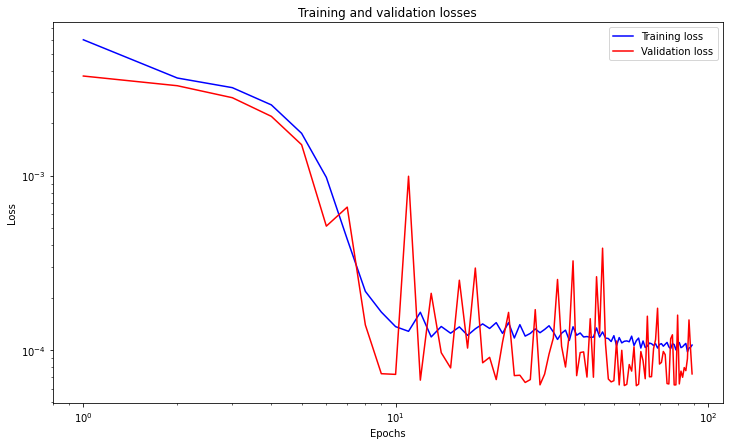

In [300]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(train_loss)+1)
plt.figure(figsize=(12,7))
plt.plot(epochs, train_loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [301]:
index_start_test = df.reset_index().loc[df.reset_index()['Timestamp'] == '2020-01-01'].index[0]

In [303]:
ndvi_ppt_tempt_pasture_pasture2 = ndvi_ppt_tempt_pasture_pasture2.set_index('Timestamp')
df_test = df.reset_index().dropna().iloc[-len(y_test):]
time_start_test = df_test.iloc[0]['Timestamp']
df_with_all_values =ndvi_ppt_tempt_pasture_pasture2[['ppt','NDVI','tmean']][time_start_test:].reset_index()

In [304]:
# df_with_all_values =ndvi_ppt_tempt_pasture_pasture2[['ppt','NDVI','tmean']][test_time:].reset_index()

In [305]:
long_term_preds_df = pd.DataFrame(long_term_forecast,columns=['preds_all_time'])
y_test_df= pd.DataFrame(y_test,columns=['y_test'])
model_prediction_df = pd.DataFrame(model_prediction,columns=['preds'])


long_term_preds_df['Timestamp'] = df_test.reset_index()['Timestamp']
y_test_df['Timestamp'] = df_test.reset_index()['Timestamp']
model_prediction_df['Timestamp'] = df_test.reset_index()['Timestamp']

In [306]:
df_with_all_values['ppt_scaled'] = .02 * df_with_all_values['ppt'] 
df_with_all_values['tmean_scaled'] = .01 * df_with_all_values['tmean']
df_all_NDVI = alt.Chart(df_with_all_values).mark_point(color='black',opacity=1, size=5).encode(
    alt.X("Timestamp:T"), 
    alt.Y("NDVI:Q")
)


df_all_ppt = alt.Chart(df_with_all_values).mark_bar(color='blue',opacity=1, size=1.5).encode(
    alt.X("Timestamp:T"), 
    alt.Y("ppt_scaled:Q")
)



df_all_tmean = alt.Chart(df_with_all_values).mark_bar(color='red',opacity=.5, size=1.5).encode(
    alt.X("Timestamp:T"), 
    alt.Y("tmean_scaled:Q")
)







# yy_test = alt.Chart(df_test.reset_index()).mark_bar(color='black',opacity=1, size=30).encode(
#     alt.X("index:Q"), 
#     alt.Y("NDVI:Q")
# )



y_test_df_plot = alt.Chart(y_test_df.reset_index()).mark_line(color='black',opacity=1, size=1,point={
      "filled": True,
      "fill": "black",
    "size" : 50,
    'opacity' : .5
    }).encode(
    alt.X("Timestamp:T"), 
    alt.Y("y_test:Q"),
    tooltip=[
        alt.Tooltip('y_test:O', title='NDVI')]
)
model_prediction_plot = alt.Chart(model_prediction_df.reset_index()).mark_line(color='blue',opacity=1,size=2,point={
      "filled": True,
      "fill": "lime",
    "size" : 50
    }).encode(
    alt.X("Timestamp:T"), 
    alt.Y("preds:Q"),
    tooltip=[
        alt.Tooltip('preds:O', title='NDVI_prediction')]
)

preds_all_time_df_plot = alt.Chart(long_term_preds_df.reset_index()).mark_line(color='red',opacity=1, size=1,point={
      "filled": True,
      "fill": "red",
    "size" : 50,
    'opacity' : .5
    }).encode(
    alt.X("Timestamp:T"), 
    alt.Y("preds_all_time:Q"),
    tooltip=[
        alt.Tooltip('preds_all_time:O', title='NDVI')]
)

(df_all_ppt+ df_all_tmean+ df_all_NDVI+ preds_all_time_df_plot + y_test_df_plot + model_prediction_plot).properties(width=1200, height=600)

alt.LayerChart(...)

In [ ]:

y_test_df_plot = alt.Chart(y_test_df.reset_index()).mark_line(color='black',opacity=1, size=2,point={
      "filled": True,
      "fill": "black",
    "size" : 50,
    'opacity' : .5
    }).encode(
    alt.X("index:Q"), 
    alt.Y("y_test:Q"),
    tooltip=[
        alt.Tooltip('y_test:O', title='NDVI')]
)
model_prediction_plot = alt.Chart(model_prediction_df.shift(0).reset_index()).mark_line(color='blue',opacity=1,size=2,point={
      "filled": True,
      "fill": "blue",
    "size" : 50
    }).encode(
    alt.X("index:Q"), 
    alt.Y("preds:Q"),
    tooltip=[
        alt.Tooltip('preds:O', title='NDVI_prediction')]
)

preds_all_time_df_plot = alt.Chart(long_term_preds_df.reset_index()).mark_line(color='red',opacity=1, size=2,point={
      "filled": True,
      "fill": "black",
    "size" : 50,
    'opacity' : .5
    }).encode(
    alt.X("index:Q"), 
    alt.Y("preds_all_time:Q"),
    tooltip=[
        alt.Tooltip('preds_all_time:O', title='NDVI')]
)

(preds_all_time_df_plot + y_test_df_plot + model_prediction_plot).properties(width=1200, height=500)

In [288]:
ndvi_ppt_tempt_pasture_pasture2 = ndvi_ppt_tempt_pasture_pasture2.reset_index()

In [289]:
ndvi_ppt_tempt_pasture_pasture2['NDVI_prediction'] = preds_ndvi_all

In [290]:
# scale for better visualization 
time_period = slice(13000,len(df0))
ndvi_ppt_tempt_pasture_pasture2['NDVI_scaled'] = ndvi_ppt_tempt_pasture_pasture2['NDVI'] * 100
ndvi_ppt_tempt_pasture_pasture2['GDD_scaled'] = ndvi_ppt_tempt_pasture_pasture2['GDD']/100
ndvi_ppt_tempt_pasture_pasture2['NDVI__preds_scaled'] = ndvi_ppt_tempt_pasture_pasture2['NDVI_prediction'] * 100
ndvi_ppt_tempt_pasture_pasture2['NDVI_rolled'] = ndvi_ppt_tempt_pasture_pasture2['NDVI__preds_scaled'].rolling(window=0,center=True).mean()
tmean = alt.Chart(ndvi_ppt_tempt_pasture_pasture2.iloc[time_period]).mark_bar(color='red',size=.2).encode(
alt.X("Timestamp:T"), alt.Y("tmean:Q"),
    tooltip=[
        alt.Tooltip('DOY:O', title='DOY'),
        alt.Tooltip('tmean:Q', title='tmean')]
)

precip = alt.Chart(ndvi_ppt_tempt_pasture_pasture2.iloc[time_period]).mark_bar(color='blue',size=1).encode(
    alt.X("Timestamp:T"), alt.Y("ppt:Q"),
    tooltip=[
        alt.Tooltip('DOY:O', title='DOY'),
        alt.Tooltip('ppt:Q', title='ppt')]
)

ndvi = alt.Chart(ndvi_ppt_tempt_pasture_pasture2.iloc[time_period]).mark_point(color='black',size=5).encode(
    alt.X("Timestamp:T"), alt.Y("NDVI_scaled:Q"),
    tooltip=[
        alt.Tooltip('DOY:O', title='DOY'),
        alt.Tooltip('NDVI:Q', title='NDVI')]
)

ndvi_preds = alt.Chart(ndvi_ppt_tempt_pasture_pasture2.iloc[time_period]).mark_point(color='lime',size=5).encode(
    alt.X("Timestamp:T"), alt.Y("NDVI__preds_scaled:Q"),
    tooltip=[
        alt.Tooltip('DOY:O', title='DOY'),
        alt.Tooltip('NDVI_prediction:Q', title='NDVI_prediction')]
)

ndvi_preds_rolled = alt.Chart(ndvi_ppt_tempt_pasture_pasture2.iloc[time_period]).mark_point(color='green',size=5).encode(
    alt.X("Timestamp:T"), alt.Y("NDVI_rolled:Q"),
    tooltip=[
        alt.Tooltip('DOY:O', title='DOY'),
        alt.Tooltip('NDVI_rolled:Q', title='NDVI_rolled')]
)

GDD = alt.Chart(ndvi_ppt_tempt_pasture_pasture2.iloc[time_period]).mark_point(size=1).encode(
alt.X("Timestamp:T"), alt.Y("GDD_scaled:Q"),
    tooltip=[
        alt.Tooltip('DOY:O', title='DOY'),
        alt.Tooltip('GDD:Q', title='GDD')]
)



(ndvi_preds_rolled+ ndvi_preds + tmean + precip + ndvi + GDD).properties(width=2000, height=500)

alt.LayerChart(...)

# the best model

In [446]:
r2_tlosss_linear_model = []
r2_tlosss_deep_model = []
i = 0
for pw in range(3):
    for tw in range(1,5):
        for nw in range(2):
            for gddw in range(1):
                
            

                i += 1
                p_feats=(pw,gddw,tw)
                p_res=nw
                input_dimension = sum(p_feats) + p_res

                linear_model = Sequential()
                linear_model.add(Dense(1, activation='linear',input_dim= input_dimension))

                model, history, X_test, y_test, model_prediction, long_term_forecast, r2,train_loss, test_loss,  long_term_loss, long_term_r2 = arx_model(df,linear_model,p_feats=p_feats,p_res=p_res,number_epochs=1500,features=['ppt','GDD','tmean'])
                
                r2_tlosss_linear_model.append([p_feats, p_res, r2,train_loss, test_loss,  long_term_loss, long_term_r2])

#                 deep_model = Sequential()
#                 deep_model.add(Dense(200, activation='sigmoid',input_dim=input_dimension))
#                 deep_model.add(Dense(30,activation='sigmoid'))
#                 deep_model.add(Dense(1,activation='sigmoid'))

#                 # print(f"temperature past window = {j}.")
#                 # print(f"predipitation past window = {i}.")
#                 # print(f"ndvi past window = {k}.")
#                 model, history, X_test, y_test, model_prediction, long_term_forecast, r2,train_loss, test_loss,  long_term_loss, long_term_r2 = arx_model(df,deep_model,p_feats=p_feats,p_res=p_res,number_epochs=1500,features=['ppt','GDD','tmean'])
#                 r2_tlosss_deep_model.append([p_feats, p_res, r2,train_loss, test_loss,  long_term_loss, long_term_r2])
                
                print(f"{i}")

train loss : 0.00398.
validation loss : 0.00297.
test loss : 0.00207.
r2 : 0.74134.
1
train loss : 0.00355.
validation loss : 0.00314.
test loss : 0.00204.
r2 : 0.74010.
long term test loss: 0.00201.
long term r2: 0.74496.
2
train loss : 0.00354.
validation loss : 0.00251.
test loss : 0.00210.
r2 : 0.73720.
3
train loss : 0.00336.
validation loss : 0.00325.
test loss : 0.00229.
r2 : 0.70852.
long term test loss: 0.00238.
long term r2: 0.69780.
4
train loss : 0.00354.
validation loss : 0.00275.
test loss : 0.00194.
r2 : 0.75703.
5
train loss : 0.00445.
validation loss : 0.00475.
test loss : 0.00206.
r2 : 0.73816.
long term test loss: 0.00185.
long term r2: 0.76530.
6
train loss : 0.00359.
validation loss : 0.00258.
test loss : 0.00209.
r2 : 0.73845.
7
train loss : 0.00323.
validation loss : 0.00321.
test loss : 0.00199.
r2 : 0.74712.
long term test loss: 0.00204.
long term r2: 0.74018.
8
train loss : 0.00396.
validation loss : 0.00296.
test loss : 0.00210.
r2 : 0.73787.
9
train loss : 0

In [438]:
scores_deep_model = [(i[0:3],i[3][-1],i[4:7]) for i in r2_tlosss_deep_model]

In [447]:
scores_linear_model = [(i[0:3],i[3][-1],i[4:7]) for i in r2_tlosss_linear_model]

In [439]:
p_list =[scores_deep_model[i][0][0] for i in range(len(scores_deep_model))]
p_res_list = [scores_deep_model[i][0][1] for i in range(len(scores_deep_model))]
r2_list = [scores_deep_model[i][0][2] for i in range(len(scores_deep_model))]
train_loss_list = [scores_deep_model[i][1] for i in range(len(scores_deep_model))]
test_loss_list = [scores_deep_model[i][2][0] for i in range(len(scores_deep_model))]
long_term_loss_list = [scores_deep_model[i][2][1] for i in range(len(scores_deep_model))]
long_term_r2_list = [scores_deep_model[i][2][2] for i in range(len(scores_deep_model))]

scores_df_deep = pd.DataFrame({'p_feats':p_list, 'p_res':p_res_list,
                     'r2':r2_list,'MSE_test':test_loss_list, 'MSE_train': train_loss_list, 'long_term_MSE':long_term_loss_list, 'long_term_r2':long_term_r2_list })

In [448]:
p_list =[scores_linear_model[i][0][0] for i in range(len(scores_linear_model))]
p_res_list = [scores_linear_model[i][0][1] for i in range(len(scores_linear_model))]
r2_list = [scores_linear_model[i][0][2] for i in range(len(scores_linear_model))]
train_loss_list = [scores_linear_model[i][1] for i in range(len(scores_linear_model))]
test_loss_list = [scores_linear_model[i][2][0] for i in range(len(scores_linear_model))]
long_term_loss_list = [scores_linear_model[i][2][1] for i in range(len(scores_linear_model))]
long_term_r2_list = [scores_linear_model[i][2][2] for i in range(len(scores_linear_model))]

scores_df_linear = pd.DataFrame({'p_feats':p_list, 'p_res':p_res_list,
                     'r2':r2_list,'MSE_test':test_loss_list, 'MSE_train': train_loss_list, 'long_term_MSE':long_term_loss_list, 'long_term_r2':long_term_r2_list })

In [449]:
scores_df_linear.sort_values(by=['r2'],ascending=False)

,p_feats,p_res,r2,MSE_test,MSE_train,long_term_MSE,long_term_r2
15,"(1, 0, 4)",1,0.764145,0.001855,0.003338,0.001868,0.762460
4,"(0, 0, 3)",0,0.757034,0.001943,0.003542,NaN,NaN
22,"(2, 0, 4)",0,0.756301,0.001949,0.003432,NaN,NaN
10,"(1, 0, 2)",0,0.754968,0.001960,0.003490,NaN,NaN
12,"(1, 0, 3)",0,0.753744,0.001970,0.003490,NaN,NaN
18,"(2, 0, 2)",0,0.751936,0.001984,0.003416,NaN,NaN
13,"(1, 0, 3)",1,0.750854,0.001959,0.003306,0.002000,0.745645
14,"(1, 0, 4)",0,0.750828,0.001993,0.003527,NaN,NaN
7,"(0, 0, 4)",1,0.747118,0.001989,0.003232,0.002043,0.740182
20,"(2, 0, 3)",0,0.744409,0.002044,0.003390,NaN,NaN


In [440]:
scores_df_deep.sort_values(by=['r2'],ascending=False)

,p_feats,p_res,r2,MSE_test,MSE_train,long_term_MSE,long_term_r2
29,"(1, 1, 4)",0,0.839816,0.001281,0.001847,NaN,NaN
9,"(0, 1, 3)",0,0.838419,0.001292,0.002626,NaN,NaN
38,"(2, 0, 2)",1,0.824526,0.001380,0.002483,0.001402,0.821769
42,"(2, 0, 3)",1,0.823651,0.001387,0.002384,0.001404,0.821435
25,"(1, 1, 3)",0,0.823279,0.001414,0.002503,NaN,NaN
33,"(2, 1, 1)",0,0.819120,0.001447,0.002410,NaN,NaN
4,"(0, 0, 2)",0,0.818120,0.001455,0.002692,NaN,NaN
17,"(1, 1, 1)",0,0.817183,0.001462,0.002543,NaN,NaN
32,"(2, 0, 1)",0,0.816145,0.001471,0.002934,NaN,NaN
45,"(2, 1, 4)",0,0.816041,0.001471,0.002429,NaN,NaN


In [52]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(scores_df_deep.sort_values(by=['r2'],ascending=False))


,p_feats,p_res,r2,MSE_test,MSE_train,long_term_MSE,long_term_r2
61,"(0, 1, 4)",3,0.722953,0.002605,0.002747,0.002608,0.722546
229,"(2, 1, 5)",1,0.708054,0.002745,0.002264,0.002746,0.707970
133,"(1, 1, 4)",1,0.703590,0.002787,0.002294,0.002786,0.703704
233,"(2, 1, 5)",2,0.701923,0.002802,0.002324,0.002803,0.701830
54,"(0, 2, 4)",1,0.700641,0.002814,0.002591,0.002814,0.700658
142,"(1, 2, 4)",3,0.699031,0.002830,0.002965,0.002824,0.699665
73,"(0, 1, 5)",2,0.697241,0.002846,0.002310,0.002846,0.697257
207,"(2, 3, 3)",3,0.696777,0.002851,0.002745,0.002845,0.697358
238,"(2, 2, 5)",3,0.695838,0.002860,0.002580,0.002858,0.696001
67,"(0, 3, 5)",0,0.694369,0.002873,0.002702,NaN,NaN


In [53]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(scores_df_linear.sort_values(by=['r2'],ascending=False))


,p_feats,p_res,r2,MSE_test,MSE_train,long_term_MSE,long_term_r2
132,"(1, 0, 4)",1,0.615670,0.003613,0.002675,4.070460e-03,5.670428e-01
218,"(2, 2, 4)",2,0.613507,0.003634,0.011059,4.131276e-03,5.605741e-01
56,"(0, 0, 4)",2,0.612171,0.003646,0.003127,4.398982e-03,5.320994e-01
92,"(1, 0, 1)",3,0.610629,0.003661,0.002837,3.949014e-03,5.799605e-01
4,"(0, 0, 1)",1,0.604148,0.003722,0.002943,4.001942e-03,5.743308e-01
116,"(1, 0, 3)",1,0.601254,0.003749,0.002753,4.153696e-03,5.581893e-01
36,"(0, 0, 3)",1,0.599585,0.003765,0.002746,4.427912e-03,5.290222e-01
152,"(1, 0, 5)",2,0.599354,0.003767,0.002874,4.871644e-03,4.818244e-01
24,"(0, 0, 2)",2,0.598305,0.003777,0.002980,4.186336e-03,5.547176e-01
88,"(1, 0, 1)",2,0.597932,0.003780,0.002948,3.674675e-03,6.091407e-01


In [291]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
make_pipeline(SplineTransformer(n_knots=5, degree=4,extrapolation="periodic"), Ridge(alpha=1e-3),)